# Feed-forward сети

In [ ]:
import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torch import optim
from tqdm import tqdm_notebook
import torchvision.transforms as transforms

In [ ]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Times New Roman'
warnings.filterwarnings('ignore')

*************************

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него

train_dataset = torchvision.datasets.CIFAR100(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)

test_dataset = torchvision.datasets.CIFAR100(root='./data',
                                            train=False,
                                            download=True,
                                            transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=6,
                                         shuffle=False)


In [ ]:
labels_name = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee',
               'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus',
               'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
               'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch',
               'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant',
               'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
               'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
               'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle',
               'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
               'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
               'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit',
               'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal',
               'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
               'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
               'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
               'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
               'willow_tree', 'wolf', 'woman', 'worm'
               ] 

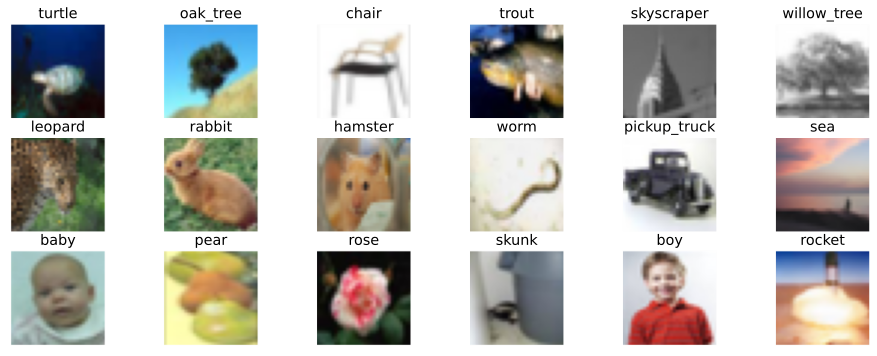

In [ ]:
N = 18
sample_idx = np.random.randint(0, 5000, N)

fig = plt.figure(figsize=(16, 8))
for j, idx in enumerate(sample_idx):
    ax = fig.add_subplot(4, 6, j+1)
    ax.imshow(train_dataset[idx][0].permute(1, 2, 0).numpy())
    plt.xticks([])
    plt.yticks([])
    plt.title(labels_name[train_dataset[idx][1]])
    plt.grid(False)
plt.show()

********************

Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
Ваша задача добавить его в архитектуру сети как функцию активации

In [ ]:
def leaky_relu_mod(x):
  tensor = torch.stack((0.1*x, 0.5*x), 0)
  return torch.amax(tensor, dim=0)

In [ ]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 10*hidden_dim)
        self.fc2 = nn.Linear(10*hidden_dim, 5*hidden_dim)
        self.fc3 = nn.Linear(5*hidden_dim, 2*hidden_dim)
        self.fc4 = nn.Linear(2*hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = leaky_relu_mod(x)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = leaky_relu_mod(x)
        x = self.fc4(x)
        return x


net = Net(3072, 100, 100)
net.to(device)

Net(
  (fc1): Linear(in_features=3072, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=100, bias=True)
)

TRAIN

In [ ]:
loss_func = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
EPOCHES = 100

In [ ]:
for epoch in tqdm_notebook(range(EPOCHES)):
  running_loss = 0
  for num, data in enumerate(train_loader):
    images, labels = data[0].to(device), data[1].to(device)

    opt.zero_grad()  # обнуляем градиент
    outputs = net(images)  # получаем предсказания
    loss = loss_func(outputs, labels) # считаем потери
    loss.backward() # ОРО
    opt.step() # обновление весов
 
    running_loss += loss.item()

  if (epoch+1) % 5 == 0:
    print(f'Epoch № {epoch+1}, loss = {running_loss/500}')
  running_loss = 0

print('Training is finished!')


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch № 5, loss = 3.210479332447052
Epoch № 10, loss = 2.812184551715851
Epoch № 15, loss = 2.4343373749256134
Epoch № 20, loss = 2.048816483259201
Epoch № 25, loss = 1.6966488683223724
Epoch № 30, loss = 1.3958885151147842
Epoch № 35, loss = 1.1702178263664245
Epoch № 40, loss = 1.0202027337551116
Epoch № 45, loss = 0.9012412818670272
Epoch № 50, loss = 0.7804086802601814
Epoch № 55, loss = 0.7711323564052581
Epoch № 60, loss = 0.6937411652207375
Epoch № 65, loss = 0.6607120033502579
Epoch № 70, loss = 0.6076408058106899
Epoch № 75, loss = 0.6147533202767372
Epoch № 80, loss = 0.5891936547160148
Epoch № 85, loss = 0.6099439038932324
Epoch № 90, loss = 0.5016179893612862
Epoch № 95, loss = 0.559000162422657
Epoch № 100, loss = 0.47022158923745155
Training is finished!


In [ ]:
data_iter = iter(test_loader)
images, labels = data_iter.next()
net.eval()
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

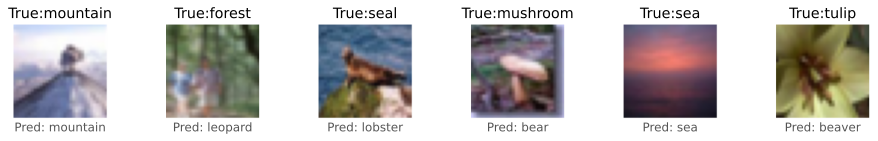

In [ ]:
fig = plt.figure(figsize=(16, 8))
for j, img in enumerate(images):
    ax = fig.add_subplot(4, 6, j+1)
    ax.imshow(img.permute(1, 2, 0).numpy())
    plt.xticks([])
    plt.yticks([])
    plt.title(f'True:{labels_name[labels[j]]}')
    plt.grid(False)
    plt.xlabel(f'Pred: {labels_name[predicted[j]]}')
plt.show()

Неподъемный датасет для линейных слоев. На CIFAR-10 со свертками 7 из 10 угадывает. а тут 100 классов. 100, Карл! Надо было полегче, а то слишком бесполезно